In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

import pickle

In [3]:
from utils.learn import train_classifier

Using TensorFlow backend.


In [4]:
data = pd.read_csv('dataset/data_cleaned.csv')

In [5]:
vectorizer = TfidfVectorizer(sublinear_tf=True)
X = vectorizer.fit_transform(data['text'])
y = data['clickbait'].values

print('X shape', X.shape, '\ny shape', y.shape)

X shape (125922, 42917) 
y shape (125922,)



Accuracy: 0.8448 (0.0031)
AUROC: 0.9060 (0.0030)


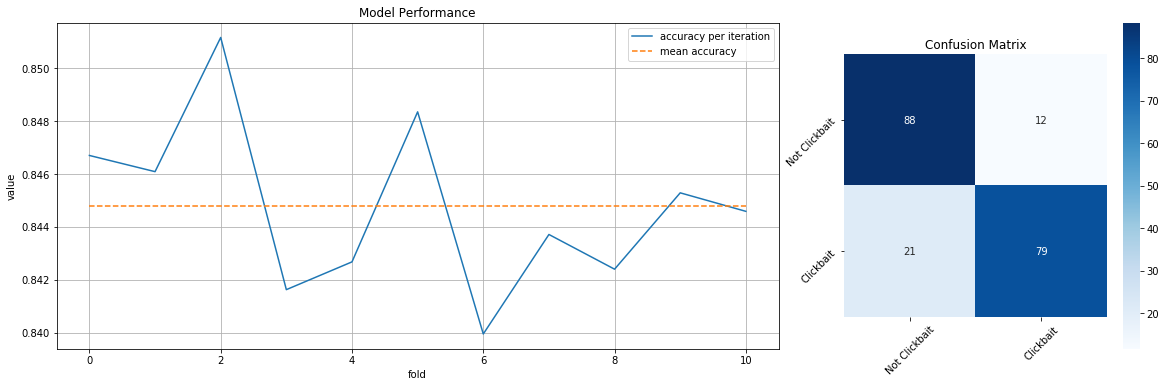

In [6]:
model = RandomForestClassifier(n_estimators=10, random_state=19, class_weight='balanced')
model_performance, cm, model = train_classifier(
    model, X, y, labels=['Not Clickbait', 'Clickbait']
)
print(f'Accuracy: {np.mean(model_performance["accuracy"]):.4f} ({np.std(model_performance["accuracy"]):.4f})')
print(f'AUROC: {np.mean(model_performance["score"]):.4f} ({np.std(model_performance["score"]):.4f})')

In [7]:
pickle.dump(model, open('rf.pkl', 'wb'))